In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Linear regression example: 

Number of passengers vs cost of flying (example from lectures slides)

Intercept: 1.5698
Slope: 0.0407


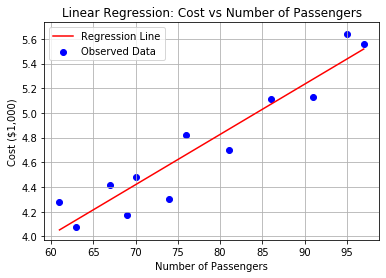

In [3]:
# Load data from Excel
df = pd.read_excel("data/Passengers_vs_Cost.xlsx")

# Extract variables
X = df[['Number of Passengers']]  # 2D array for sklearn
y = df['Cost ($1,000)']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Print model coefficients
print(f"Intercept: {model.intercept_:.4f}")
print(f"Slope: {model.coef_[0]:.4f}")

# Plot
plt.scatter(X, y, color='blue', label='Observed Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel("Number of Passengers")
plt.ylabel("Cost ($1,000)")
plt.title("Linear Regression: Cost vs Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()

## Use statmodels library

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
# Step 1: Load data from Excel
file_path = "data/Passengers_vs_Cost.xlsx"
df = pd.read_excel(file_path)

# Step 2: Fit linear regression model using statsmodels
# Note: Q(...) used to handle column names with special characters or spaces
model = smf.ols('Q("Cost ($1,000)") ~ Q("Number of Passengers")', data=df).fit()

# Step 3: Display regression summary (includes t-test for coefficients)
print("=== Regression Summary ===")
print(model.summary())

# Step 4: Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=1)

print("\n=== ANOVA Table ===")
print(anova_table)

=== Regression Summary ===
                            OLS Regression Results                            
Dep. Variable:     Q("Cost ($1,000)")   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     89.09
Date:                Sat, 31 May 2025   Prob (F-statistic):           2.69e-06
Time:                        14:31:30   Log-Likelihood:                 4.8312
No. Observations:                  12   AIC:                            -5.662
Df Residuals:                      10   BIC:                            -4.693
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


# Multiple regression example (two independent variables):

Real-estate example (from lectures slides))

A real-estate study was conducted in a small city to determine what variables are related to the market price of a home. Suppose the analyst wants to develop a regression model to predict the market price of a home by two variables, “total number of square feet in the house” and “the age of the house”.

In [11]:
# Step 1: Load the data
df = pd.read_excel("data/Housing_Market_Data.xlsx")

# Step 2: Fit multiple linear regression model
model = smf.ols('Q("Market Price ($1,000)") ~ Q("Total Square Feet") + Q("Age of House (Years)")', data=df).fit()

# Step 3: Display summary
print(model.summary())

# Step 4: Perform ANOVA
anova = sm.stats.anova_lm(model, typ=1)

# Extract ANOVA info
# Compute total sum of squares (SST)
SST = anova['sum_sq'].sum()
SSR = anova['sum_sq'][:-1].sum()  # regression sum of squares (excluding residual)
SSE = anova['sum_sq'][-1]         # residual sum of squares

# Degrees of freedom
n = len(df)              # number of observations
k = model.df_model       # number of predictors (not including intercept)
df_reg = int(k)
df_err = int(model.df_resid)
df_total = n - 1

# Mean squares
MSR = SSR / df_reg
MSE = SSE / df_err

# F-statistic
F_stat = MSR / MSE

# Create custom ANOVA summary table
custom_anova = pd.DataFrame({
    'Source of Variation': ['Regression', 'Error (Residual)', 'Total'],
    'Degrees of Freedom': [df_reg, df_err, df_total],
    'Sum of Squares': [SSR, SSE, SST],
    'Mean Square': [MSR, MSE, '—'],
    'F': [F_stat, '—', '—']
})

print("\n=== ANOVA Table ===")
print(custom_anova)

                                OLS Regression Results                                
Dep. Variable:     Q("Market Price ($1,000)")   R-squared:                       0.741
Model:                                    OLS   Adj. R-squared:                  0.715
Method:                         Least Squares   F-statistic:                     28.63
Date:                        Sat, 31 May 2025   Prob (F-statistic):           1.35e-06
Time:                                14:50:07   Log-Likelihood:                -88.105
No. Observations:                          23   AIC:                             182.2
Df Residuals:                              20   BIC:                             185.6
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------